In [4]:
# https://towardsdatascience.com/pca-with-numpy-58917c1d0391

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)


In [52]:
melb = pd.read_csv("./melb_data.csv")

melb.dropna(how='any', inplace=True)
melb.head()
melb.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

In [35]:
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [10]:
# Convert all categorical data to numerics
# check out one hot encoding

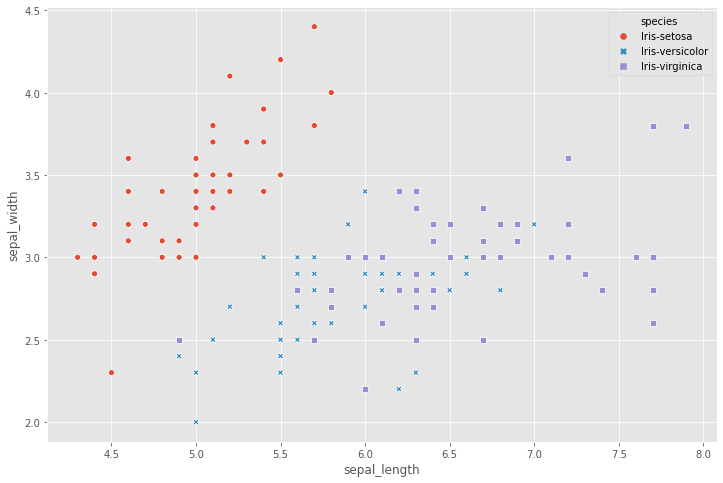

In [3]:
# Plotting data using seaborn. DO OURSELVES HOMEWORK!!
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

In [11]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray


In [31]:
# Standardizing data
X = melb[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']].values
print(X)
y = melb.Price.values
X = standardize_data(X)
X

[[2.000e+00 2.500e+00 2.000e+00 ... 0.000e+00 1.560e+02 7.900e+01]
 [3.000e+00 2.500e+00 3.000e+00 ... 0.000e+00 1.340e+02 1.500e+02]
 [4.000e+00 2.500e+00 3.000e+00 ... 2.000e+00 1.200e+02 1.420e+02]
 ...
 [1.000e+00 6.800e+00 1.000e+00 ... 1.000e+00 0.000e+00 3.564e+01]
 [2.000e+00 4.600e+00 2.000e+00 ... 1.000e+00 0.000e+00 6.160e+01]
 [6.000e+00 6.300e+00 6.000e+00 ... 2.000e+00 1.087e+03 3.885e+02]]


array([[-0.95922445, -1.29215935, -0.92995401, ..., -1.69227228,
        -0.35103059, -0.6888734 ],
       [ 0.0706412 , -1.29215935,  0.10099876, ..., -1.69227228,
        -0.37554647,  0.09282823],
       [ 1.10050686, -1.29215935,  0.10099876, ...,  0.4585624 ,
        -0.39114749,  0.00474917],
       ...,
       [-1.9890901 , -0.52589118, -1.96090678, ..., -0.61685494,
        -0.52487048, -1.1662619 ],
       [-0.95922445, -0.91793536, -0.92995401, ..., -0.61685494,
        -0.52487048, -0.88044535],
       [ 3.16023816, -0.61499213,  3.19385708, ...,  0.4585624 ,
         0.68643697,  2.71868513]])

In [32]:
# Calculating the covariance matrix
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[1.00016142, 0.28393095, 0.95194617, 0.61395224, 0.42259371,
        0.09877052, 0.60831274],
       [0.28393095, 1.00016142, 0.29028934, 0.1245496 , 0.27365898,
        0.05937851, 0.15962838],
       [0.95194617, 0.29028934, 1.00016142, 0.61785092, 0.42579491,
        0.09718744, 0.59309599],
       [0.61395224, 0.1245496 , 0.61785092, 1.00016142, 0.34086306,
        0.07630745, 0.53451128],
       [0.42259371, 0.27365898, 0.42579491, 0.34086306, 1.00016142,
        0.11766633, 0.33433643],
       [0.09877052, 0.05937851, 0.09718744, 0.07630745, 0.11766633,
        1.00016142, 0.08483858],
       [0.60831274, 0.15962838, 0.59309599, 0.53451128, 0.33433643,
        0.08483858, 1.00016142]])

In [33]:
# Using np.linalg.eig function. HOW we can get eigenstuff from the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")


Eigenvector: 
 [[-0.50097164 -0.70882494 -0.24279781 -0.38181072 -0.17504079  0.10496766
  -0.01438478]
 [-0.21071173 -0.00494589  0.17447547  0.18666086 -0.38635109 -0.50526823
   0.6969426 ]
 [-0.50024947  0.70494259 -0.21904591 -0.40616634 -0.17266036  0.10004448
  -0.0058062 ]
 [-0.41390388 -0.01088802  0.8574543   0.0804065   0.0134113   0.22289172
  -0.19238337]
 [-0.32570333 -0.00308229 -0.04981042 -0.02339898  0.87725892 -0.28534805
   0.19968107]
 [-0.09092276  0.00120662  0.00974168 -0.01088566 -0.1308896  -0.74920034
  -0.64271686]
 [-0.41074617  0.02166056 -0.35330237  0.80453464 -0.05819621  0.17683757
  -0.1551178 ]] 

Eigenvalues: 
 [3.36883475 0.04792151 0.4546485  0.49163384 0.67699061 1.01547936
 0.94562137] 



In [34]:
# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     print("I: ", i)
     variance_explained.append((i/sum(eigen_values))*100)
        
# Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea
print(variance_explained)

I:  3.3688347511860437
I:  0.04792151063774439
I:  0.45464850334387086
I:  0.4916338364222739
I:  0.6769906107866175
I:  1.0154793625266239
I:  0.945621368599632
[48.11844342801253, 0.6844825195998048, 6.4939303657089535, 7.022206992151607, 9.66973354658099, 14.504506711363211, 13.506696436582901]


In [36]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)


[ 48.11844343  48.80292595  55.29685631  62.31906331  71.98879685
  86.49330356 100.        ]


Text(0.5, 1.0, 'Explained variance vs Number of components')

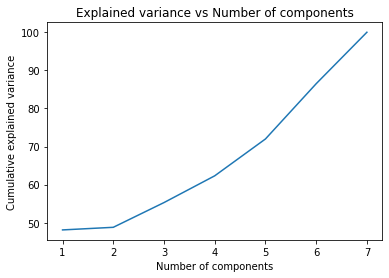

In [38]:
# Visualizing the eigenvalues and finding the "elbow" in the graphic
sns.lineplot(x = [1,2,3,4, 5, 6, 7], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [47]:
# Using two first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:]).T
print(projection_matrix)

[[-0.50097164 -0.70882494 -0.24279781 -0.38181072 -0.17504079  0.10496766
  -0.01438478]
 [-0.21071173 -0.00494589  0.17447547  0.18666086 -0.38635109 -0.50526823
   0.6969426 ]
 [-0.50024947  0.70494259 -0.21904591 -0.40616634 -0.17266036  0.10004448
  -0.0058062 ]
 [-0.41390388 -0.01088802  0.8574543   0.0804065   0.0134113   0.22289172
  -0.19238337]
 [-0.32570333 -0.00308229 -0.04981042 -0.02339898  0.87725892 -0.28534805
   0.19968107]
 [-0.09092276  0.00120662  0.00974168 -0.01088566 -0.1308896  -0.74920034
  -0.64271686]
 [-0.41074617  0.02166056 -0.35330237  0.80453464 -0.05819621  0.17683757
  -0.1551178 ]]


In [48]:
# Getting the product of original standardized X and the eigenvectors 
X_pca = X.dot(projection_matrix)
print(X_pca)

[[ 2.41944248  0.02944213 -0.15935463 ... -0.58169472  0.90262328
  -0.7309281 ]
 [ 0.48702942  0.02780559  0.2938217  ... -0.96339657  1.58382479
  -1.12769304]
 [-0.10994736 -0.69543793 -1.23786216 ...  0.73148719  0.76094724
  -0.41887122]
 ...
 [ 3.15127234  0.01501919  0.56361748 ...  0.47448541  0.04316104
   0.2244389 ]
 [ 2.08481554  0.0199172  -0.08163938 ...  0.25104549  0.50303534
  -0.11392893]
 [-5.20820611  0.05098288 -0.83469721 ... -0.68596447  1.24373645
  -1.64900365]]
